In [2]:
from ultralytics import YOLO
import cv2
import numpy as np
import pandas as pd
from utils.get_exact import *
from matplotlib import pyplot as plt

In [3]:
# load model
car_detector = YOLO("model/yolov8s.pt")
plate_detector = YOLO("model/vn-large-8m/best.pt")

# ocr_model = ...


0: 384x640 5 motorcycles, 64.0ms
Speed: 3.0ms preprocess, 64.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 640x448 1 License_Plate, 58.0ms
Speed: 3.0ms preprocess, 58.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)


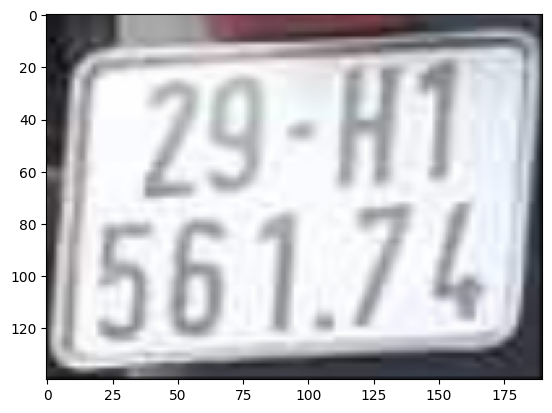


0: 640x320 1 License_Plate, 85.0ms
Speed: 3.0ms preprocess, 85.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 320)


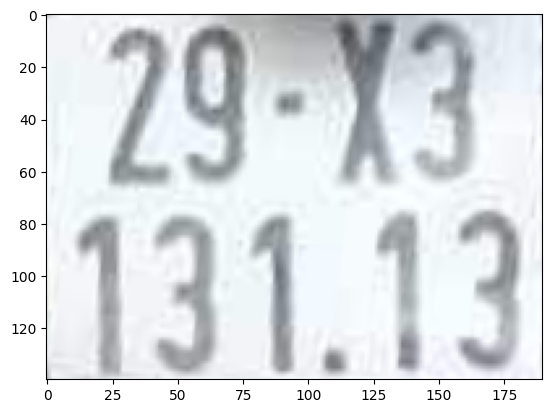


0: 640x480 1 License_Plate, 93.0ms
Speed: 3.0ms preprocess, 93.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)
[[[137  74]]

 [[ 56 133]]

 [[ 12  56]]

 [[ 95  12]]]


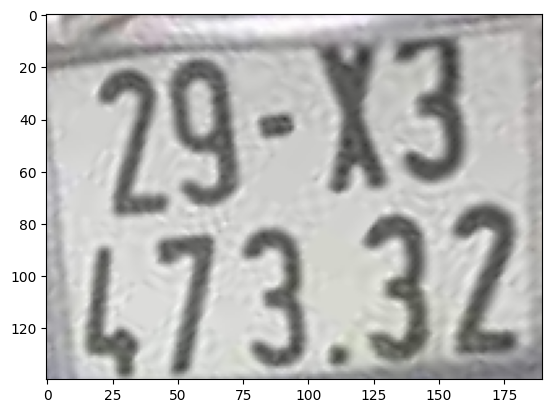


0: 640x320 1 License_Plate, 27.0ms
Speed: 3.0ms preprocess, 27.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 320)


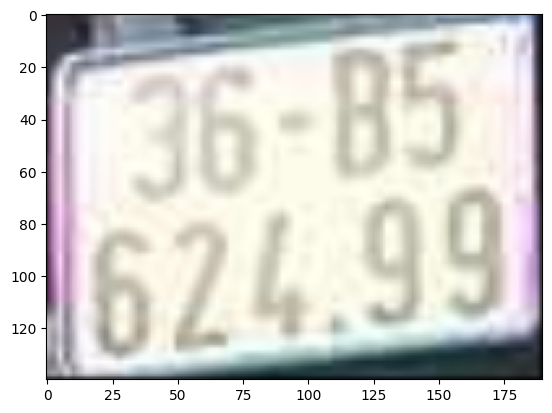


0: 640x544 1 License_Plate, 107.0ms
Speed: 4.0ms preprocess, 107.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 544)


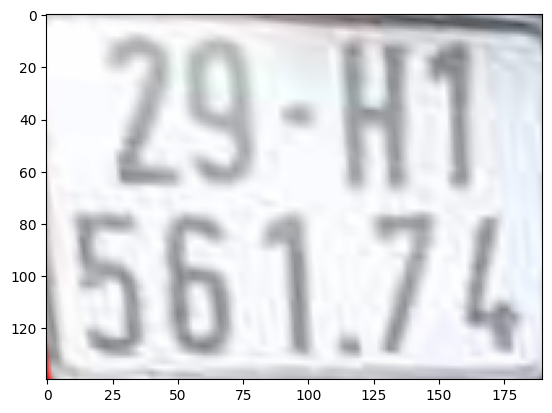

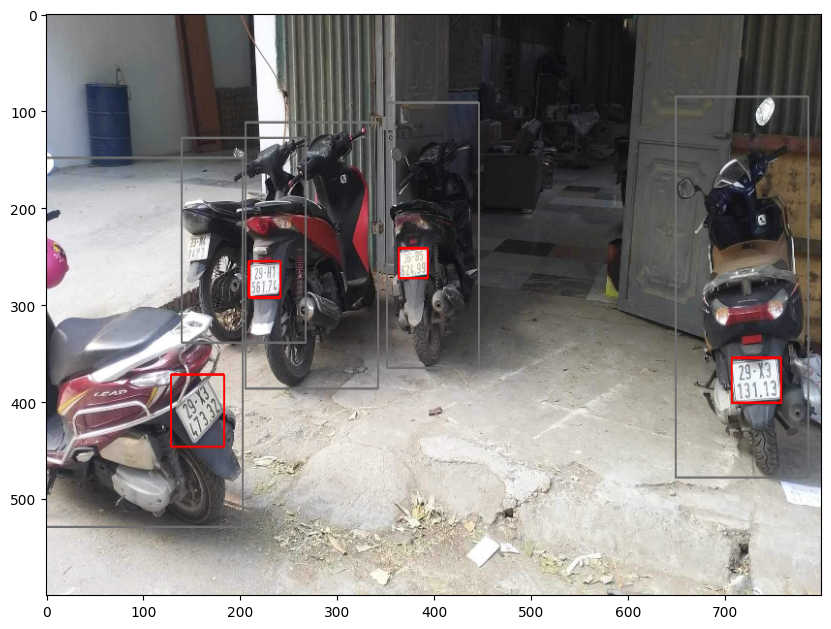

In [4]:
#load image
img = cv2.imread("./images/Multiple_standing_moto_3.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
vehicle = [2, 3, 5, 7]

#detect vehicle
detections = car_detector.predict(img)
a = detections[0].boxes.data
px = pd.DataFrame(a.cpu().numpy())
detections_ = []
for index, detection in px.iterrows():
    x1 = int(detection[0])
    y1 = int(detection[1])
    x2 = int(detection[2])
    y2 = int(detection[3])
    confidence = float(detection[4])
    class_id = int(detection[5])
    if int(class_id) in vehicle:
        detections_.append([x1, y1, x2, y2])
#save vehical to jpg file
count = 0
for detection in detections_:
    x1, y1, x2, y2 = detection

    x1 = x1 
    y1 = y1 
    x2 = x2 + 2
    y2 = y2 + 2
    crop_img = img[y1:y2, x1:x2]
    cv2.rectangle(img, (x1, y1), (x2, y2), (111, 111, 111), 3)
    
    vehicle_roi = img[int(y1):int(y2), int(x1):int(x2)]

    detections_plate = plate_detector.predict(vehicle_roi)
    b = detections_plate[0].boxes.data
    px = pd.DataFrame(b.cpu().numpy())
    detections_plate_ = []

    for index, detection in px.iterrows():
        x3 = int(detection[0])
        y3 = int(detection[1])
        x4 = int(detection[2])
        y4 = int(detection[3])
        confidence = float(detection[4])
        class_id = int(detection[5])
        detections_plate_.append([x3, y3, x4, y4])

    for detection in detections_plate_:
        (x3, y3, x4, y4) = detection

        plate_roi = vehicle_roi[int(y3):int(y4), int(x3):int(x4)]

        plate = extract_plate(plate_roi)

        warped = warpPerspective(plate_roi, plate)                  #<------- warp này là output của các biển số xe đã được crop rồi

        cv2.rectangle(vehicle_roi, (x3, y3), (x4, y4), (255, 0, 0), 3)
        plt.imshow(warped)
        plt.show()
        
img = cv2.resize(img, (800, 600))
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()